# Meereisdaten

## Überblick

* Import von Rasterdaten und Anzeige mittels rasterio
* Plotten von Rasterdaten mittels matplotlib
* Importieren und Erkunden von Vektordaten mittels fiona
* Filtern von Daten
* Plotten von Vektordaten

## Import von Rasterdaten und Anzeige mittels rasterio

In [20]:
import rasterio
from rasterio.plot import show

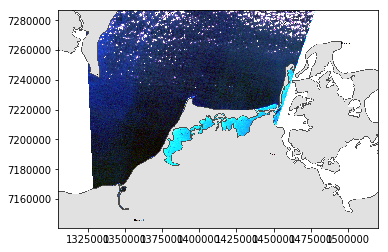

In [21]:
with rasterio.open("/tmp/bsh/Meereis/SatTiffs/ek_edit160106_Sentinel2_vom06012016.tif") as src:
    show((src))

In [22]:
src.meta

{'count': 3,
 'crs': CRS({'proj': 'merc', 'lon_0': 0, 'k': 1, 'x_0': 0, 'y_0': 0, 'datum': 'WGS84', 'units': 'm', 'no_defs': True}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 3162,
 'nodata': None,
 'transform': Affine(46.17483051195663, 0.0, 1305381.878773258,
       0.0, -46.18089141339655, 7286699.396508208),
 'width': 4653}

## Importieren und Erkunden von Vektordaten mittels fiona

In [23]:
import fiona                     # I/O vector data (shape, geojson, ...)
import pyproj                    # Change coordinate reference system


src_shp = fiona.open("/tmp/bsh/Meereis/Python/Ek-20170215/IceArea170215.shp", "r")

print("File data type:")
print(src_shp.driver)
print()
print("Information about data:")
print(src_shp.schema)
print()
print("Coordinate reference system:")
print(src_shp.crs)
print()
print("Bounds:")
print(src_shp.bounds)

# Create local projection
proj_IceArea170215 = pyproj.Proj(**src_shp.crs)
wgs84 = pyproj.Proj(init="epsg:4326")

File data type:
ESRI Shapefile

Information about data:
{'properties': OrderedDict([('Id', 'int:6'), ('AB', 'int:4'), ('Tmin', 'int:4'), ('Tmax', 'int:4'), ('RN', 'int:4'), ('ICEFLZ', 'int:4'), ('ICERCN', 'int:4'), ('ICEFCN', 'int:4'), ('ICEFTY', 'int:4'), ('ICEMLT', 'int:4')]), 'geometry': 'Polygon'}

Coordinate reference system:
{'init': 'epsg:4326'}

Bounds:
(8.006228522256777, 53.53897168721839, 30.60774296047401, 66.0229100616541)


## Erkunden 

In [24]:
import json
print("Number of entries: %d" % len(src_shp))
print("First entry:")
print(src_shp[0])
#print(json.dumps(src_shp[0], indent=2)) #Pretty print via json

Number of entries: 184
First entry:
{'type': 'Feature', 'id': '0', 'geometry': {'type': 'Polygon', 'coordinates': [[(28.692863308459838, 60.41714250886839), (28.68307043063084, 60.41545849335381), (28.69536049027636, 60.35081462971152), (28.696228266201953, 60.34625025897377), (28.694802187836164, 60.335647629932076), (28.666280620522233, 60.332819678327404), (28.667706698888196, 60.319383550376024), (28.69195003110474, 60.31726154929094), (28.723323755150144, 60.303111339639486), (28.737584538807198, 60.283998800122035), (28.737584538807198, 60.26487504690457), (28.714767284955883, 60.25920659547017), (28.649679106490794, 60.26459639344056), (28.62920258301438, 60.26629200587376), (28.575011605117652, 60.27550073892296), (28.556472586363554, 60.28824700005236), (28.52367278395258, 60.305941873547006), (28.50513376519882, 60.307357048248704), (28.47090788442182, 60.322212669964934), (28.412438671428447, 60.3596752938874), (28.413864749794072, 60.37168246770352), (28.399603966137022, 60

## Filtern

In [25]:
IceArea170215_Tmax = []

for entry in src_shp:

    Tmax = entry["properties"]["Tmax"]
    
    if Tmax > 40:
        IceArea170215_Tmax.append(entry)

print("Number of all entries: %d" % len(src_shp))
print("Number of entries 'Tmax > 40': %d" % len(IceArea170215_Tmax))

Number of all entries: 184
Number of entries 'Tmax > 40': 6


## Einfache Visualisierung mittels matplotlib

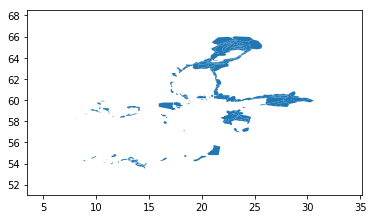

In [26]:
import fiona
import matplotlib as mpl
import matplotlib.pyplot as plt
from descartes import PolygonPatch

with fiona.open("/tmp/bsh/Meereis/Python/Ek-20170215/IceArea170215.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]
    
# create a new matplotlib figure and axes instance
fig = plt.figure()
ax = fig.add_subplot(111)

#Bounds of the shapefile
minx, miny, maxx, maxy = src_shp.bounds

w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
ax.set_aspect(1)

patches = [PolygonPatch(feature) for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches))
#patches = [PolygonPatch(feature, edgecolor="red", facecolor="blue", linewidth=2) for feature in features]
#ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
plt.show()

## Fortgeschritte Visualisierung und Speicherung der Grafik als png und pdf

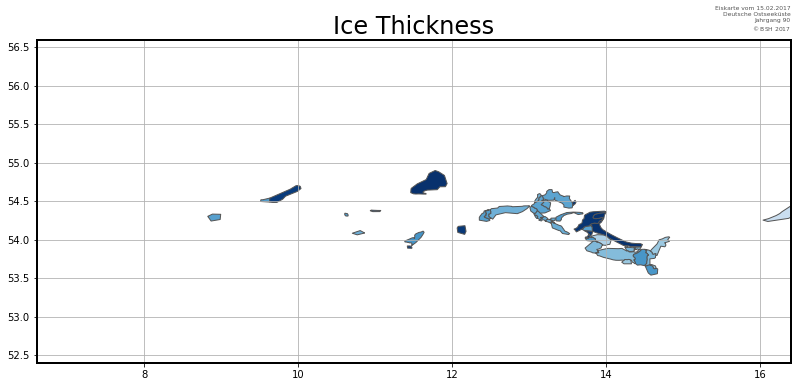

In [27]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import fiona
from shapely.geometry import Polygon, MultiPolygon, shape
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# We can extract ice thickness boundaries by filtering on the Tmax key
mp = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open('/tmp/bsh/Meereis/Python/Ek-20170215/IceArea170215.shp')
    if pol['properties']['Tmax']])

#Set colormap for random blue colors
cm = plt.get_cmap('Blues')
num_colours = len(mp)

# create a new matplotlib figure and axes instance
fig = plt.figure()
ax = fig.add_subplot(111)

#Bounds of Deutsche Ostseeküste
minx, miny, maxx, maxy = 8,53,15,56

w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
ax.set_aspect(1)

#Linewidth for the frame
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(2)

#Create and add patches
patches = []
for idx, p in enumerate(mp):
    colour = cm(1. * idx / num_colours)
    patches.append(PolygonPatch(p, fc=colour, ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))

plt.title("Ice Thickness",size=24)
plt.grid(True)

# Small text
smallprint = ax.text(
    1, 1.02,
    'Eiskarte vom 15.02.2017\nDeutsche Ostseeküste\nJahrgang 90\n$\copyright$ BSH 2017',
    ha='right', va='bottom',
    size=6,
    color='#555555',
    transform=ax.transAxes)


plt.tight_layout()
fig.set_size_inches(11.69,8.27) #DINA4 landscape

plt.savefig('EK3_170215_028_simple.png', alpha=True, dpi=300)

plt.show()

with PdfPages('EK3_170215_028_simple.pdf') as pdf:
    pdf.savefig(fig)

## Visualisierung mittels matplotlib und einfacher (high-resolution 'h') Basemap als Hintergrundkarte

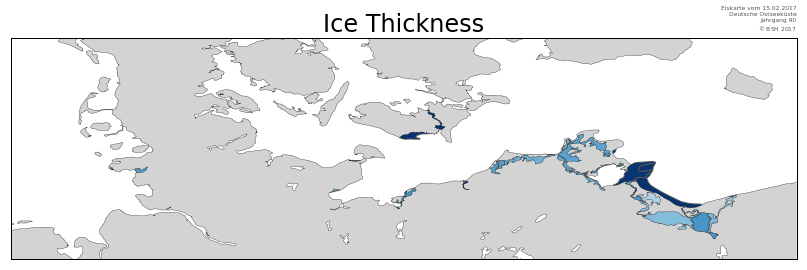

In [28]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
import fiona
from shapely.geometry import Polygon, MultiPolygon, shape
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.basemap import Basemap


# We can extract ice thickness boundaries by filtering on the Tmax key
mp = MultiPolygon(
    [shape(pol['geometry']) for pol in fiona.open('/tmp/bsh/Meereis/Python/Ek-20170215/IceArea170215.shp')
    if pol['properties']['Tmax']])

#Set colormap for random blue colors
cm = plt.get_cmap('Blues')
num_colours = len(mp)

# create a new matplotlib figure and axes instance
fig = plt.figure()
ax = fig.add_subplot(111)


#Bounds 
minx, miny, maxx, maxy = 9,54,14,55


# add a basemap and a small additional extent
m = Basemap(
#    projection='merc',
#   ellps = 'WGS84',
    llcrnrlon=minx - 0.2 * w,
    llcrnrlat=miny - 0.2 * h,
    urcrnrlon=maxx + 0.2 * w,
    urcrnrlat=maxy + 0.2 * h,
    lat_ts=0,
    # resolution='h' requires conda install -c conda-forge basemap-data-hires
    resolution='h',
    epsg=4326)
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines(linewidth=0.3)
m.drawstates()
m.drawmapboundary()
m.fillcontinents(color='lightgrey')

#Create and add patches
patches = []
for idx, p in enumerate(mp):
    colour = cm(1. * idx / num_colours)
    patches.append(PolygonPatch(p, fc=colour, ec='#555555', alpha=1., zorder=1))
ax.add_collection(PatchCollection(patches, match_original=True))

plt.title("Ice Thickness",size=24)
plt.grid(True)

# Small text
smallprint = ax.text(
    1, 1.02,
    'Eiskarte vom 15.02.2017\nDeutsche Ostseeküste\nJahrgang 90\n$\copyright$ BSH 2017',
    ha='right', va='bottom',
    size=6,
    color='#555555',
    transform=ax.transAxes)

plt.tight_layout()
fig.set_size_inches(11.69,8.27) #DINA4 landscape

plt.savefig('EK3_170215_028_basemap.png', alpha=True, dpi=300)

plt.show()

with PdfPages('EK3_170215_028_basemap.pdf') as pdf:
    pdf.savefig(fig)